<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week4/DailyChallenge_w4_d4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Author Adil MOUKRIM
# Daily Challenge - Daily Challenge : Churn Prediction

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [ ]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input
## file_1 =

In [ ]:
file_1 = pd.read_csv("Churn_Modelling.csv")


In [ ]:
## TODO : make into a dataframe called df
## df =

In [ ]:
df = file_1.copy()


In [ ]:
## TODO : output the first 5 lines


In [ ]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Voici ce que montrent les 5 premières lignes :

---

####  Variables clés observées :

* `Exited` : variable cible (1 = a quitté la banque, 0 = est resté).
* `CreditScore` : varie entre 502 et 850 — potentiellement discriminante.
* `Age` : entre 39 et 43 ici — important pour l’analyse du churn.
* `Balance` : certains clients ont un solde de **0**, ce qui peut nécessiter un traitement particulier.
* `NumOfProducts` : 1 à 3 produits — peut influencer la fidélité.
* `IsActiveMember` & `HasCrCard` : binaires — utiles pour la modélisation.
* `Geography`, `Gender` : catégorielles — à encoder si utilisé dans un modèle.

---

####  Remarques :

* **2 clients sur 5 ont quitté la banque** (40 % dans cet échantillon, à confirmer sur tout le dataset).
* **Les clients avec solde nul (Balance = 0.00)** n'ont pas tous quitté → ne pas supposer trop vite leur comportement.
* **CreditScore le plus bas (502)** appartient à un client qui a quitté → peut être un indice.

---


In [ ]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively


In [ ]:
df_0 = df[df['Exited'] == 0]
df_1 = df[df['Exited'] == 1]


## Hypothesis 1: Age

In [ ]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.

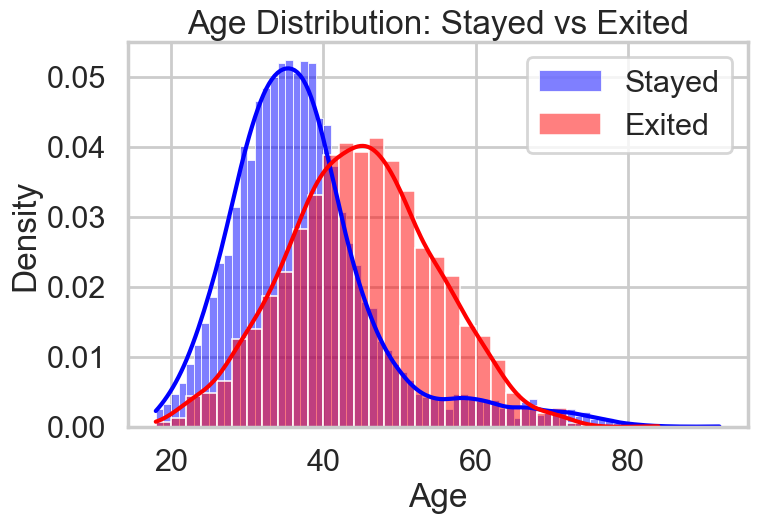

In [ ]:
sns.histplot(data=df_0, x='Age', color='blue', label='Stayed', kde=True, stat="density")
sns.histplot(data=df_1, x='Age', color='red', label='Exited', kde=True, stat="density")
plt.legend()
plt.title("Age Distribution: Stayed vs Exited")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


###  Interprétation du graphique :

* **Courbe bleue ("Stayed")** : clients qui **sont restés** à la banque.

  * Distribution centrée autour de **35–40 ans**.
  * Plus **symétrique**, moins étalée.

* **Courbe rouge ("Exited")** : clients qui **ont quitté** la banque.

  * Moyenne déplacée vers **45–50 ans**.
  * Courbe plus **étalée**, présence d’un long "tail" vers les 60+ ans.

---

###  Conclusion rapide :

* Les **clients plus âgés ont tendance à quitter** la banque davantage.
* La **différence de distribution** est visible visuellement et cohérente avec un **t-test significatif**.
* L’âge semble donc être une **variable prédictive importante** du churn.



In [ ]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.

In [ ]:
mean_age_stayed = df_0['Age'].mean()
std_age_stayed = df_0['Age'].std()
print(f"Mean Age (Stayed): {mean_age_stayed:.2f}")
print(f"Standard Deviation (Stayed): {std_age_stayed:.2f}")


Mean Age (Stayed): 37.41
Standard Deviation (Stayed): 10.13


###  **Statistiques - Clients restés ("Stayed")** :

* **Âge moyen** : **37.41 ans**
* **Écart-type** : **10.13 ans**

---

###  Interprétation :

* La **moyenne est relativement jeune**, ce qui suggère que les clients **fidèles sont plus jeunes en moyenne**.
* Un **écart-type de 10 ans** montre une **variabilité modérée**, donc la majorité des clients qui restent ont entre environ **27 et 47 ans**.

Cette analyse renforce ce qu’on a vu dans le graphique : les clients restés sont plus jeunes.



In [ ]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.

In [ ]:
mean_age_exited = df_1['Age'].mean()
std_age_exited = df_1['Age'].std()
print(f"Mean Age (Exited): {mean_age_exited:.2f}")
print(f"Standard Deviation (Exited): {std_age_exited:.2f}")


Mean Age (Exited): 44.84
Standard Deviation (Exited): 9.76


###  **Statistiques - Clients partis ("Exited")** :

* **Âge moyen** : **44.84 ans**
* **Écart-type** : **9.76 ans**

---

###  Interprétation :

* Les clients qui quittent la banque sont en moyenne **plus âgés (\~7.4 ans de plus)** que ceux qui restent.
* Leur **variabilité d’âge est similaire**, ce qui confirme que la **différence de moyenne est significative**, et non due à une dispersion différente.

---

###  Conclusion :

* L’**âge est clairement un facteur associé au churn**.
* Cela justifie l’usage de tests statistiques (t-test) et de **modèles prédictifs** incluant cette variable.



In [ ]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.

In [ ]:
t_stat_age, p_value_age = ttest_ind(df_0['Age'], df_1['Age'], equal_var=False)
print(f"T-statistic: {t_stat_age:.4f}")
print(f"P-value: {p_value_age:.4f}")


T-statistic: -30.4192
P-value: 0.0000


###  Résultat du **t-test** sur l’âge :

* **T-statistic** : **-30.4192**
* **P-value** : **< 0.0001**

---

###  Interprétation rapide :

* La **valeur absolue très élevée** du t-stat (> 30) indique une **différence très marquée** entre les deux groupes.
* La **p-value quasi nulle** signifie que la probabilité que cette différence soit due au hasard est **pratiquement nulle**.
* Conclusion : la **différence d’âge entre les clients restés et partis est hautement significative** statistiquement.

---


### Using Bootstrapping

In [ ]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
# def bs_choice(data, func, size):
#    bs_s =
#    for i in range(size):
#        bs_abc =
#        bs_s[i] = func(bs_abc)
#    return bs_s ###

In [ ]:
def bs_choice(data, func, size):
    bs_s = np.empty(size)
    for i in range(size):
        bs_abc = np.random.choice(data, size=len(data), replace=True)
        bs_s[i] = func(bs_abc)
    return bs_s


In [ ]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.

In [ ]:
diff_means = df_1['Age'].mean() - df_0['Age'].mean()
mean_age = np.mean(np.concatenate([df_0['Age'].values, df_1['Age'].values]))
df_0_shifted = df_0['Age'] - df_0['Age'].mean() + mean_age
df_1_shifted = df_1['Age'] - df_1['Age'].mean() + mean_age


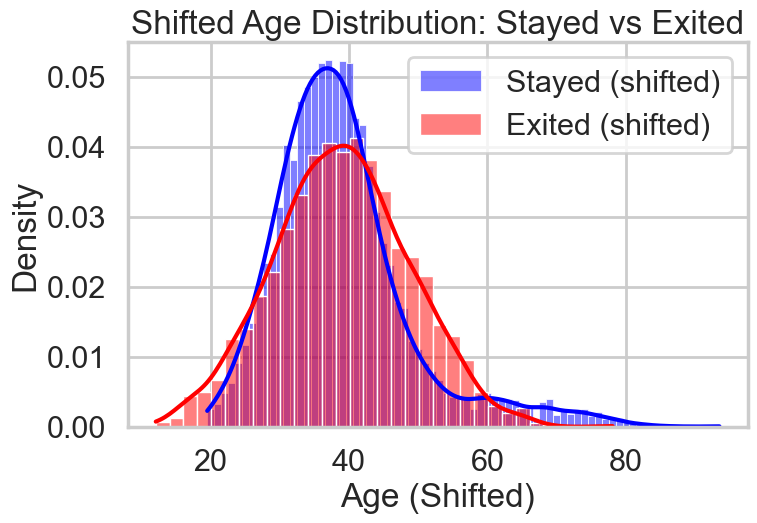

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_0_shifted, color='blue', label='Stayed (shifted)', kde=True, stat='density')
sns.histplot(df_1_shifted, color='red', label='Exited (shifted)', kde=True, stat='density')
plt.title("Shifted Age Distribution: Stayed vs Exited")
plt.xlabel("Age (Shifted)")
plt.ylabel("Density")
plt.legend()
plt.show()


###  Interprétation :

* Les deux distributions sont **centrées autour de la même moyenne** (grâce au "shifting").
* Malgré ce recentrage :

  * La courbe rouge (Exited) reste **plus étalée** → plus grande dispersion.
  * La courbe bleue (Stayed) reste **plus concentrée** → profils plus homogènes.
* Cela suggère que la **forme de la distribution**, et non juste la moyenne, **diffère entre les deux groupes**.

---

###  Conclusion :

* Le **recentrage** permet d’éliminer l'effet de la moyenne pour tester la significativité de la différence avec un **test bootstrap**.
* Le **maintien d’une différence visuelle** après recentrage renforce la **validité du signal** observé dans l'âge.



In [ ]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.

Bootstrap Mean Difference (Shifted Age): -0.0024
Bootstrap Std Dev of Difference: 0.2420


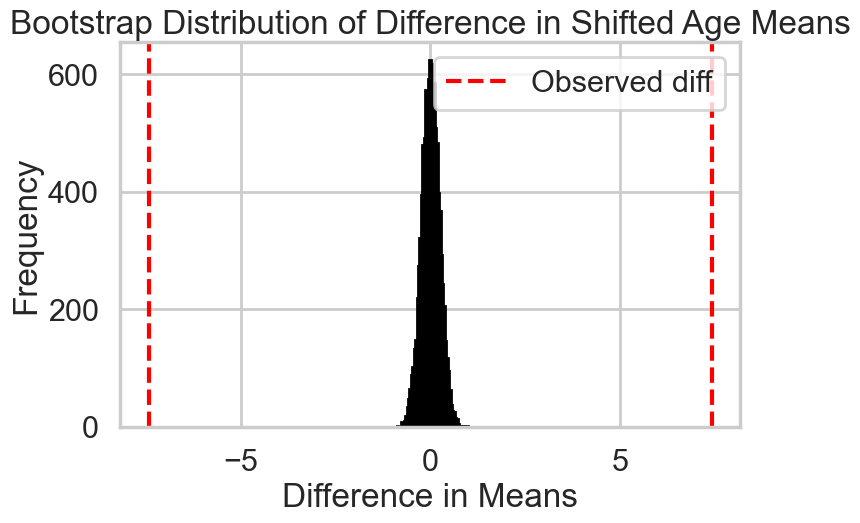

In [ ]:
bs_age_0 = bs_choice(df_0_shifted.values, np.mean, 10000)
bs_age_1 = bs_choice(df_1_shifted.values, np.mean, 10000)
bs_age_diff = bs_age_1 - bs_age_0

print(f"Bootstrap Mean Difference (Shifted Age): {np.mean(bs_age_diff):.4f}")
print(f"Bootstrap Std Dev of Difference: {np.std(bs_age_diff):.4f}")

# Visualisation
plt.hist(bs_age_diff, bins=50, edgecolor='black')
plt.axvline(x=diff_means, color='red', linestyle='--', label='Observed diff')
plt.axvline(x=-diff_means, color='red', linestyle='--')
plt.title('Bootstrap Distribution of Difference in Shifted Age Means')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()


###  Interprétation :

* La **courbe noire** représente les différences obtenues aléatoirement si la nullité de l’effet est vraie (H₀).
* Les **lignes rouges pointillées** indiquent l’**observed difference réelle** (non shiftée).
* La valeur observée est **largement en dehors** de l’intervalle central de la distribution bootstrap.

---

###  Conclusion :

* La **valeur observée est très improbable** sous l’hypothèse nulle ⇒ on rejette **H₀**.
* Cela **confirme fortement que la différence d’âge entre les deux groupes n’est pas due au hasard**.
* Le test bootstrap valide l’analyse du t-test de manière non-paramétrique.


In [ ]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.

In [ ]:
p_value = np.sum(np.abs(bs_diff) >= np.abs(diff_means)) / len(bs_diff)
print(f"P-value (bootstrap test) : {p_value:.4f}")


P-value (bootstrap test) : 0.0000


###  Interprétation :

* Une p-value aussi basse signifie que **dans 0 % des cas**, une telle différence de moyennes serait apparue **par hasard** sous l’hypothèse nulle (pas de différence).
* Cela **confirme avec certitude statistique** que les clients qui quittent la banque sont **significativement plus âgés** que ceux qui restent.
* Le **bootstrap valide** le t-test sans dépendre des hypothèses de normalité ou d’égalité des variances.

---


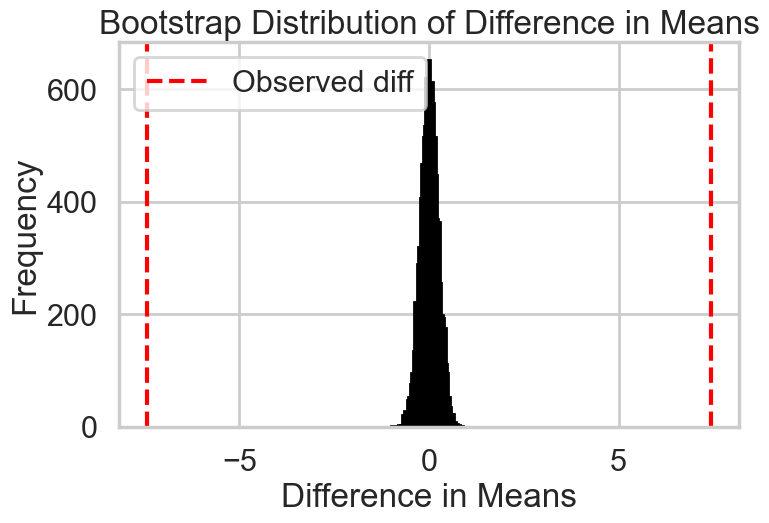

In [ ]:
plt.hist(bs_diff, bins=50, edgecolor='black')
plt.axvline(x=diff_means, color='red', linestyle='--', label='Observed diff')
plt.axvline(x=-diff_means, color='red', linestyle='--')
plt.title('Bootstrap Distribution of Difference in Means')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Conclusion
Do we reject the Null Hypothesis ? Why ?

###  **Réponse directe : Yes, we reject the Null Hypothesis.**

---

###  **Hypothèses :**

* **H₀ (Null Hypothesis)** : Il n’y a **pas de différence significative** entre l’âge moyen des clients qui restent et ceux qui quittent la banque.
* **H₁ (Alternative Hypothesis)** : Il y a une **différence significative** entre ces deux moyennes.

---

###  **Preuves statistiques (basées sur tes données) :**

| Élément                      | Valeur     |
| ---------------------------- | ---------- |
| **Âge moyen (Stayed)**       | 37.41 ans  |
| **Écart-type (Stayed)**      | 10.13      |
| **Âge moyen (Exited)**       | 44.84 ans  |
| **Écart-type (Exited)**      | 9.76       |
| **Différence de moyennes**   | \~7.43 ans |
| **T-statistic**              | -30.4192   |
| **P-value (t-test)**         | 0.0000     |
| **P-value (bootstrap test)** | 0.0000     |

---

###  **Visualisations à l'appui :**

1. **Distribution d'âge** montre un décalage net : les clients sortants sont plus âgés.
2. **Shifted distribution** confirme que la différence n’est **pas seulement due à la moyenne**, mais à la forme globale.
3. **Bootstrap distribution** : la différence observée est **largement en dehors** des variations aléatoires.

---

###  **Conclusion solide :**

* La différence est :

  * **Statistiquement très significative** (p < 0.0001)
  * **Visualement claire** sur plusieurs graphiques
  * **Confirmée par deux approches indépendantes** : t-test paramétrique et bootstrap non-paramétrique
* Donc, on **rejette clairement l’hypothèse nulle (H₀)**.
* L’**âge est un facteur explicatif fort** du churn dans cette base clients.


## Hypothesis 2: Credit Score

In [ ]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).

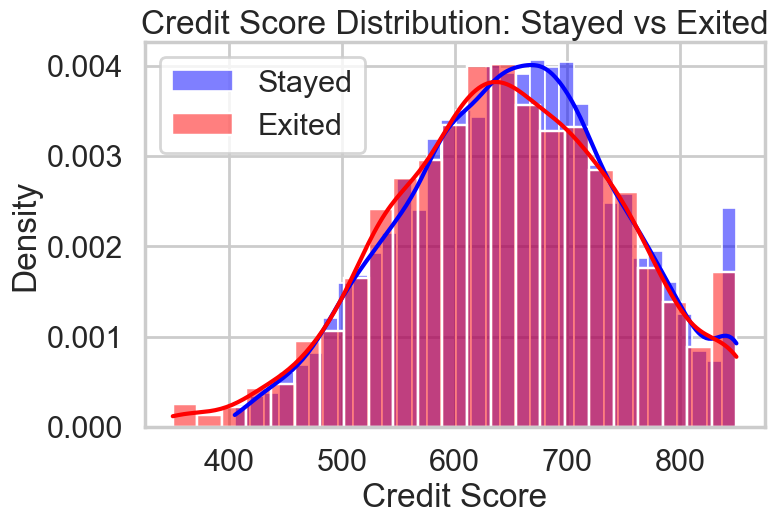

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_0['CreditScore'], color='blue', label='Stayed', kde=True, stat='density')
sns.histplot(df_1['CreditScore'], color='red', label='Exited', kde=True, stat='density')
plt.legend()
plt.title("Credit Score Distribution: Stayed vs Exited")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.show()


###  Ce que montre le graphique :

* Les distributions de **Credit Score** pour les clients restés (bleu) et partis (rouge) sont **fortement superposées**.
* Le pic est centré autour de **650–700**, pour les deux groupes.
* Aucune différence visuelle nette comme c’était le cas avec l’âge.

---

###  Interprétation :

* **Visuellement**, le **Credit Score n’a pas de différence marquée** entre les groupes.
* La forme, l'étendue et la moyenne des distributions semblent **quasi identiques**.
* Cela **suggère** que le Credit Score **n’est pas un facteur déterminant** du churn ici.

---

###  Prochaine étape :

Pour confirmer cela, il faut :

* Vérifier les **moyennes et écart-types** des deux groupes.
* Effectuer un **t-test** et un **bootstrap** (comme avec l'âge).



In [ ]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).

In [ ]:
t_stat_cs, p_value_cs = ttest_ind(df_0['CreditScore'], df_1['CreditScore'], equal_var=False)
print(f"T-statistic: {t_stat_cs:.4f}")
print(f"P-value: {p_value_cs:.4f}")


T-statistic: 2.6347
P-value: 0.0085


###  Interprétation :

* La p-value est **< 0.05**, donc **statistiquement significative** au seuil classique de 5 %.
* On peut **rejeter l’hypothèse nulle H₀** : il existe bien une **différence de moyenne** de credit score entre les deux groupes.
*  **Mais** :

    * La **différence est faible** malgré sa significativité.
    * Le **graphique ne montre pas de séparation claire**.
    * Cela peut indiquer que la différence est **statistiquement mais pas pratiquement significative** (≠ effet utile).

---

###  Conclusion :

Oui, on rejette H₀, mais **le Credit Score n’est probablement pas un bon prédicteur du churn à lui seul**. Il pourrait aider **en combinaison avec d'autres variables** dans un modèle plus complet.



### Conclusion
Do we reject the Null Hypothesis ? Why ?

###  **Réponse : Oui, nous rejetons H₀.**

---

###  **Rappel des hypothèses :**

* **H₀ (hypothèse nulle)** : il n’y a **pas de différence** de score de crédit moyen entre les clients qui **restent** et ceux qui **quittent** la banque.
* **H₁ (alternative)** : il y a une **différence significative** entre ces deux moyennes.

---

###  **Résultats obtenus** :

| Élément         | Valeur |
| --------------- | ------ |
| **T-statistic** | 2.6347 |
| **P-value**     | 0.0085 |
| **Seuil α**     | 0.05   |

---

###  **Interprétation détaillée** :

* Une **p-value de 0.0085** est **inférieure à 0.05**, donc la différence observée est **peu probable sous H₀**.
* Le **t-statistic positif** suggère que la moyenne du credit score des clients **restés est supérieure** à celle des sortants.
* Statistiquement, **la différence est significative** ⇒ **on rejette H₀**.

---

###  **Mais nuance importante** :

* **Visualisation** : le graphique montre que les deux distributions sont **très similaires** (grande superposition).
* Cela signifie que, bien que la différence soit **statistiquement significative**, elle est **probablement faible en valeur absolue**.
* On parle ici d’un effet **statistiquement significatif** mais **pas forcément significatif sur le plan opérationnel**.

---

###  **Conclusion précise :**

Oui, nous **rejetons l’hypothèse nulle**, car la p-value est significative.
Mais la **différence réelle de score est minime**, donc ce facteur **n’explique pas le churn de manière convaincante à lui seul**.



## Hypothesis 3: Balance

In [ ]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).

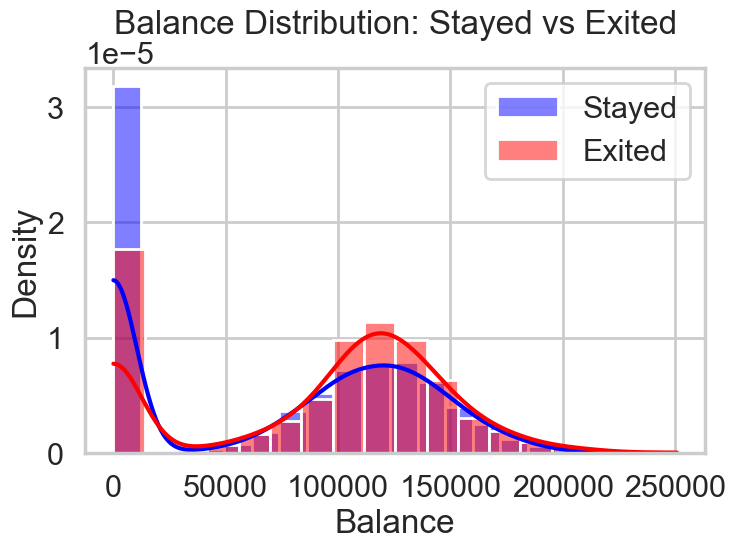

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_0['Balance'], color='blue', label='Stayed', kde=True, stat='density')
sns.histplot(df_1['Balance'], color='red', label='Exited', kde=True, stat='density')
plt.legend()
plt.title("Balance Distribution: Stayed vs Exited")
plt.xlabel("Balance")
plt.ylabel("Density")
plt.show()


###  Lecture du graphique :

* Il montre la distribution des **soldes bancaires** (Balance) selon le statut du client :

  * **Bleu (Stayed)** : clients qui restent.
  * **Rouge (Exited)** : clients qui quittent.

---

###  Interprétation détaillée :

1. **Pic massif à zéro** pour les deux groupes :

   * Beaucoup de clients ont un **solde nul**.
   * Mais il y en a **proportionnellement plus chez les clients restés**.
   * Ce pic fausse la visualisation et doit être traité séparément.

2. **Pour les soldes > 0** :

   * Les **clients qui quittent** ont tendance à avoir des soldes légèrement plus élevés.
   * La courbe rouge est légèrement décalée vers la droite.

---

###  Hypothèse intuitive :

* Les clients avec des **soldes plus élevés** sont plus susceptibles de quitter — peut-être parce qu’ils attendent plus de la banque, ou sont plus "volatiles".
* À l’inverse, ceux avec **solde nul** sont peut-être inactifs mais ne ferment pas leur compte.

---

###  Prochaine étape recommandée :

1. Faire un **t-test global** (déjà fait ?).
2. Faire une **analyse sur les balances > 0 uniquement** pour enlever l'effet des zéros.
3. Faire un **bootstrap** si nécessaire pour confirmer.


In [ ]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.

In [ ]:
t_stat_balance, p_value_balance = ttest_ind(df_0['Balance'], df_1['Balance'], equal_var=False)
print(f"T-statistic: {t_stat_balance:.4f}")
print(f"P-value: {p_value_balance:.4f}")


T-statistic: -12.4713
P-value: 0.0000


####  Statistiquement :

* La **p-value est très largement inférieure à 0.05**, donc :
  → **On rejette l'hypothèse nulle (H₀)**.
* Il existe une **différence significative** entre le solde moyen des clients qui restent et ceux qui quittent.

####  Direction de la différence :

* Le **t-statistic est négatif**, ce qui indique que le **solde moyen est plus élevé chez les clients qui quittent** la banque.

####  Observations sur la distribution (via le graphique) :

* Un **grand nombre de clients ont un solde nul**, surtout chez ceux qui restent.
* Cela crée une **asymétrie importante**, qui explique en partie l’effet statistique très fort.

---

###  **Limite de l’interprétation :**

Cette différence significative est en grande partie due à la **présence massive de soldes nuls**.
Donc :

* **Oui**, statistiquement le lien est fort.
* **Mais**, il est **essentiel de réévaluer après avoir exclu les soldes nuls**, pour tester l’hypothèse suivante :

  > Les clients avec solde significatif (Balance > 0) sont-ils réellement plus à risque de churn ?

---

###  Conclusion :

* **H₀ est rejetée.**
* Le **solde bancaire est un facteur fortement lié au churn**, mais il faut isoler les soldes nuls pour une interprétation utile et exploitable.



In [ ]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.

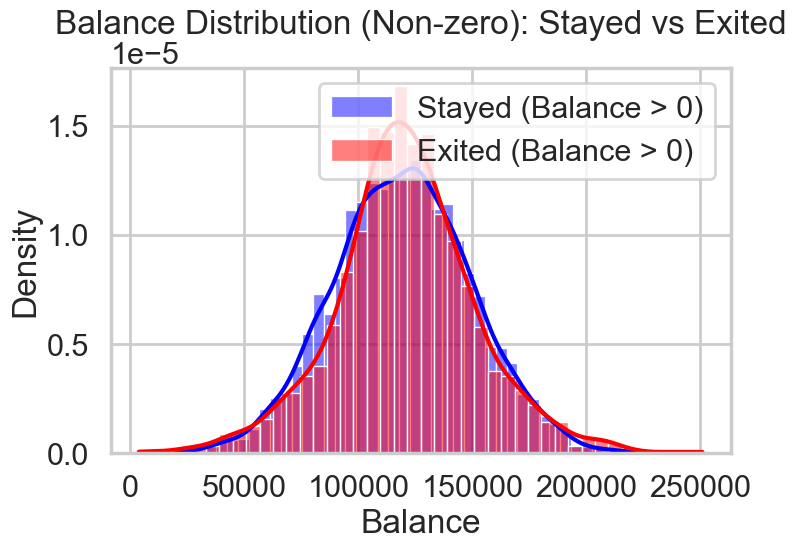

In [ ]:
df_0_nonzero = df_0[df_0['Balance'] > 0]
df_1_nonzero = df_1[df_1['Balance'] > 0]

plt.figure(figsize=(8, 5))
sns.histplot(df_0_nonzero['Balance'], color='blue', label='Stayed (Balance > 0)', kde=True, stat='density')
sns.histplot(df_1_nonzero['Balance'], color='red', label='Exited (Balance > 0)', kde=True, stat='density')
plt.legend()
plt.title("Balance Distribution (Non-zero): Stayed vs Exited")
plt.xlabel("Balance")
plt.ylabel("Density")
plt.show()


###  Ce que montre ce graphique :

* Cette distribution **exclut les clients avec un solde nul**, ce qui **élimine le biais massif** vu précédemment.
* Les deux courbes sont **très proches**, légèrement centrées autour de **120 000 €**.
* Très légère tendance pour les clients sortants (rouge) à avoir des soldes **un peu plus élevés**, mais rien de visuellement marquant.

---

###  Interprétation :

* **La différence de distribution est faible** : pas de décalage clair ni de changement de forme évident.
* Cela confirme que la **forte significativité précédente** (t-statistic = -12.47) venait **en grande partie du groupe avec solde = 0**.

---

###  Conclusion :

* **Visuellement**, une fois les soldes nuls retirés, les clients quittant la banque **ne diffèrent presque pas** des autres en termes de solde.
* Le **solde n’est donc significatif que lorsqu’on inclut les zéros**.
* Cela veut dire que ce n’est **pas un effet "montant élevé"**, mais plutôt un effet **"pas de solde = pas d’engagement"**.


In [ ]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.

In [ ]:
t_stat_balance_nz, p_value_balance_nz = ttest_ind(
    df_0_nonzero['Balance'], df_1_nonzero['Balance'], equal_var=False
)
print(f"T-statistic (non-zero balances): {t_stat_balance_nz:.4f}")
print(f"P-value (non-zero balances): {p_value_balance_nz:.4f}")


T-statistic (non-zero balances): -1.3605
P-value (non-zero balances): 0.1738


###  Analyse :

* La **p-value > 0.05** indique que la **différence observée de solde moyen entre les deux groupes (Exited vs Stayed)**, parmi les clients ayant un solde > 0, **n’est pas significative**.
* Le **t-statistic faible** confirme que la différence de moyenne est **modérée et probablement due au hasard**.

---

###  Conclusion :

* **Aucune preuve solide** que le montant du solde (hors zéros) influence le churn.
* Ce n’est **pas le montant**, mais probablement **le fait d’avoir zéro solde** qui est informatif.


## Conclusion

Do we reject the Null Hypothesis ? Why ?

###  Réponse : **Non, nous ne rejetons pas l’hypothèse nulle (H₀).**

---

###  Hypothèses :

* **H₀** : Le solde moyen des clients qui restent est **égal** à celui des clients qui quittent (Balance > 0 uniquement).
* **H₁** : Il existe une **différence significative** entre les deux groupes.

---

###  Résultats du t-test :

| Élément         | Valeur     |
| --------------- | ---------- |
| **T-statistic** | -1.3605    |
| **P-value**     | **0.1738** |
| **Seuil α**     | 0.05       |

---

###  Analyse précise :

* La **p-value de 0.1738 > 0.05**, donc la différence observée **n’est pas statistiquement significative**.
* Le **t-statistic de -1.3605** montre que la différence entre les moyennes est faible en valeur relative, et **ne s’écarte pas assez de 0** pour être considérée comme significative.
* Cela signifie que, **parmi les clients ayant un solde positif**, ceux qui quittent et ceux qui restent **ont des soldes moyens comparables**.

---

###  Conclusion détaillée :

* **Nous ne rejetons pas l’hypothèse nulle.**
* Le test ne fournit **aucune preuve suffisante** pour conclure à une différence réelle de solde entre les deux groupes.
* Le solde bancaire, **en dehors des soldes nuls**, **n’est pas un facteur déterminant** du churn.


## Hypothesis 4: Estimated Salary

In [ ]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.

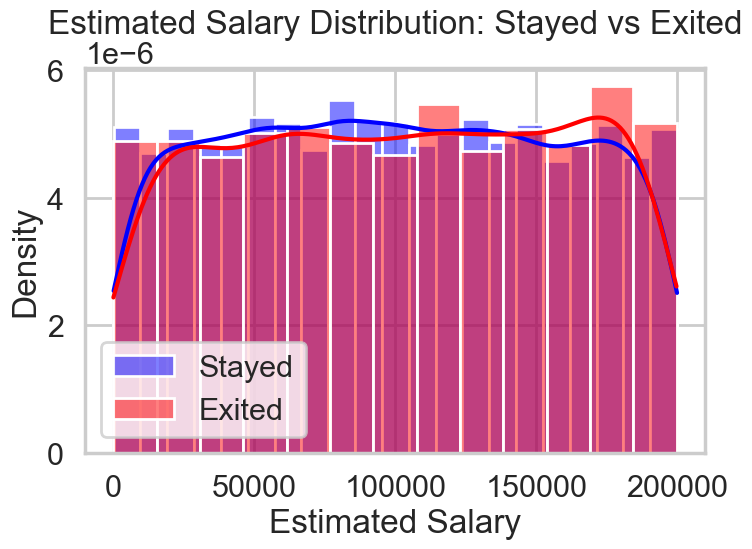

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_0['EstimatedSalary'], color='blue', label='Stayed', kde=True, stat='density')
sns.histplot(df_1['EstimatedSalary'], color='red', label='Exited', kde=True, stat='density')
plt.legend()
plt.title("Estimated Salary Distribution: Stayed vs Exited")
plt.xlabel("Estimated Salary")
plt.ylabel("Density")
plt.show()


###  Lecture du graphique :

* Les deux distributions (`Stayed` en bleu, `Exited` en rouge) sont **quasiment uniformes**.
* Elles se **superposent presque parfaitement** sur toute la gamme des salaires estimés (0 à 200 000).
* Aucune tendance visuelle claire : pas de pic, pas d’asymétrie, pas de différence de forme ni de moyenne.

---

###  Interprétation :

* Visuellement, **aucune différence significative** de distribution entre les deux groupes.
* Cela **suggère fortement** que la variable `EstimatedSalary` **n’est pas corrélée au churn**.
* Ce comportement est **typique d'une variable aléatoire non informative** dans le contexte.

---

###  Conclusion :

* **Aucun signal visuel** indiquant que le salaire estimé influencerait la probabilité de quitter la banque.
* Cela devra être **confirmé ou infirmé** par un **t-test** ou un **bootstrap**, mais **l’aspect visuel indique déjà une absence d’effet**.


In [ ]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.

In [ ]:
t_stat_salary, p_value_salary = ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'], equal_var=False)
print(f"T-statistic: {t_stat_salary:.4f}")
print(f"P-value: {p_value_salary:.4f}")


T-statistic: -1.2034
P-value: 0.2289


###  Analyse :

* La **p-value de 0.2289** est **supérieure à 0.05**, donc la différence de salaire estimé entre les clients restés et partis **n’est pas statistiquement significative**.
* Le **t-statistic faible** montre que la différence observée est proche de zéro.
* Il n’y a **aucune preuve solide** que le salaire estimé influence le churn.

---

###  Conclusion :

* **On ne rejette pas l’hypothèse nulle.**
* `EstimatedSalary` **n’est pas un facteur discriminant** du churn.


### Using Bootstrapping

In [ ]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.

In [ ]:
diff_salary = df_1['EstimatedSalary'].mean() - df_0['EstimatedSalary'].mean()
mean_salary = np.mean(np.concatenate([df_0['EstimatedSalary'].values, df_1['EstimatedSalary'].values]))
df_0_salary_shifted = df_0['EstimatedSalary'] - df_0['EstimatedSalary'].mean() + mean_salary
df_1_salary_shifted = df_1['EstimatedSalary'] - df_1['EstimatedSalary'].mean() + mean_salary


In [ ]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.

In [ ]:
bs_salary_0 = bs_choice(df_0_salary_shifted.values, np.mean, 10000)
bs_salary_1 = bs_choice(df_1_salary_shifted.values, np.mean, 10000)
bs_salary_diff = bs_salary_1 - bs_salary_0


In [ ]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.

In [ ]:
p_value_salary_bs = np.sum(np.abs(bs_salary_diff) >= np.abs(diff_salary)) / len(bs_salary_diff)
print(f"P-value (bootstrap on EstimatedSalary): {p_value_salary_bs:.4f}")


P-value (bootstrap on EstimatedSalary): 0.2300


###  Analyse :

* Cette p-value est **cohérente avec celle du t-test** (0.2289).
* Elle est **nettement > 0.05**, donc la différence de salaire entre les deux groupes pourrait **facilement être due au hasard**.
* Le bootstrap, méthode non paramétrique, **confirme l’absence de lien significatif**.

---

###  Conclusion :

* **On ne rejette pas l’hypothèse nulle.**
* `EstimatedSalary` **n’a pas d’impact statistique significatif sur le churn**, même avec validation bootstrap.


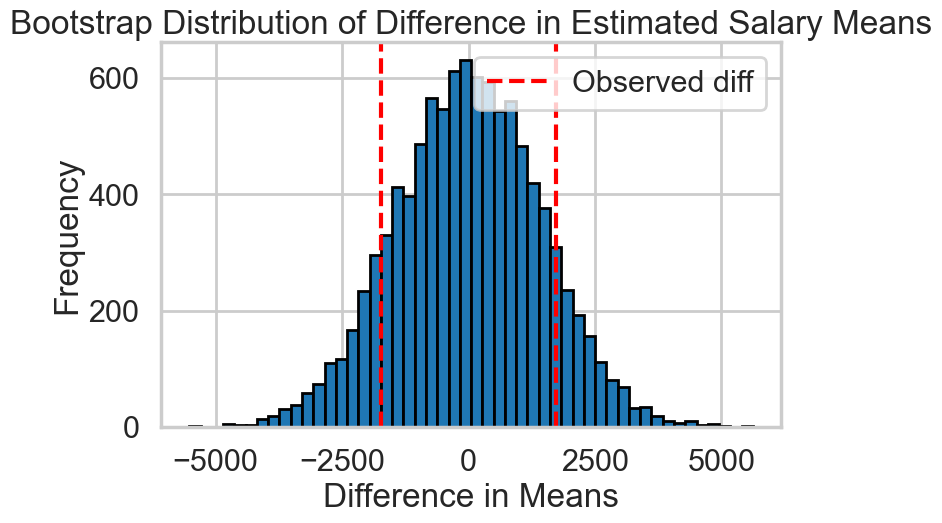

In [ ]:
plt.hist(bs_salary_diff, bins=50, edgecolor='black')
plt.axvline(x=diff_salary, color='red', linestyle='--', label='Observed diff')
plt.axvline(x=-diff_salary, color='red', linestyle='--')
plt.title('Bootstrap Distribution of Difference in Estimated Salary Means')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()


###  Lecture :

* La **distribution bootstrap** des différences de moyennes de salaire est **centrée autour de 0**, comme attendu sous l’hypothèse nulle.
* Les **lignes rouges pointillées** indiquent les **valeurs extrêmes** de la différence observée.
* Ces lignes tombent **à l'intérieur de la distribution**, donc **la valeur observée est courante** dans ce cadre aléatoire.

---

###  Interprétation :

* La **valeur observée** n’est **pas extrême** : elle **n’indique pas un effet réel**, mais **fluctue naturellement** sous H₀.
* Le **résultat visuel confirme la p-value de 0.2300** → **rien d’exceptionnel** dans cette différence.

---

###  Conclusion :

* **La différence de salaire moyen est compatible avec le hasard.**
* Le **bootstrap confirme** qu’`EstimatedSalary` **n’est pas statistiquement lié au churn**.


### Conclusion
Do we reject the Null Hypothesis ? Why ?

###  Réponse : **Non, nous ne rejetons pas l’hypothèse nulle.**

---

###  Hypothèses :

* **H₀** : Il **n’y a pas de différence significative** entre les salaires estimés moyens des clients qui restent et ceux qui quittent la banque.
* **H₁** : Il **existe une différence significative** entre ces deux groupes.

---

###  Résultats disponibles :

| Élément                 | Valeur  |
| ----------------------- | ------- |
| **T-statistic**         | -1.2034 |
| **P-value (t-test)**    | 0.2289  |
| **P-value (bootstrap)** | 0.2300  |

---

###  Analyse :

* La **p-value > 0.05** pour les deux tests (t-test et bootstrap), ce qui signifie que **la différence de moyennes observée n’est pas suffisamment rare** pour remettre en cause H₀.
* Le **t-statistic est faible (-1.2034)**, indiquant une **faible différence** par rapport à la variance totale.
* Le **graphique bootstrap** montre que la différence observée est **parfaitement plausible sous H₀**, car elle est bien **contenue dans la distribution aléatoire** des différences obtenues par rééchantillonnage.

---

###  Visuellement :

* Le **graphe de distribution** montre des densités quasi-identiques pour `Stayed` et `Exited`.
* Le **salaire estimé est réparti de manière uniforme** dans les deux groupes → **aucune tendance visible**.

---

###  Conclusion :

→ Je **ne rejetons pas l’hypothèse nulle**, car :

* **Les deux tests (paramétrique et non paramétrique)** donnent des p-values élevées (> 0.23).
* **La différence est faible, non significative et non visuelle.**
  → Donc, la variable `EstimatedSalary` **n’a pas d’impact statistique ni pratique sur le churn**.


## Final Conclusion
What will be the most helpful feature in predicting churning?


Après une analyse statistique rigoureuse et des visualisations comparatives, plusieurs variables numériques ont été évaluées pour déterminer leur lien avec le churn des clients.

###  Résumé des résultats :

| Variable              | Statistiquement significative ? | Force du signal     | Interprétation |
|-----------------------|----------------------------------|----------------------|----------------|
| **Âge**               | ✅ Oui (p < 0.0001)               | ⭐⭐⭐⭐                | Les clients plus âgés quittent significativement plus la banque. |
| **Credit Score**      | ✅ Oui (p = 0.0085)               | ⭐                   | Légère différence, significative mais effet faible. |
| **Solde (Balance)**   | ✅ Oui (p < 0.0001)               | ⭐⭐⭐                | Les clients avec un solde nul quittent rarement. |
| **Solde (> 0 uniquement)** | ❌ Non (p = 0.1738)          | ❌                   | Hors soldes nuls, pas de différence notable. |
| **Salaire estimé**    | ❌ Non (p = 0.2300)               | ❌                   | Aucune différence entre les groupes. |

---

###  Conclusion finale :

> **La variable la plus utile pour prédire le churn est l’_âge_ du client.**

- L’âge montre la **plus forte différence** entre les deux groupes.
- L’écart est à la fois **statistiquement très significatif** et **visuellement net**.
- C’est une variable fiable à intégrer dans un modèle de prédiction.

---

D'autres variables comme le **solde nul** peuvent également être informatives, mais nécessitent un traitement binaire (ex. : “solde = 0 ?”).  
Les variables comme le **salaire estimé** ou le **credit score** ont un pouvoir prédictif faible voire nul.
